* Roberts算法有两种卷积核：反应45度方向灰度变化率的Roberts135,和对135度方向变化率的Roberts45
* n个卷积核对图像做卷积，通常平方和后开方效果最好，但耗时。Roberts135&Roberts45搭配此方法效果不错
* 特点：Roberts边缘检测使用很少领域像素，故对噪点高度敏感，需先对图像平滑处理
* Roberts135&Roberts45均为偶数，5.1使用convolve2d函数当高宽默认为偶数时，锚点在右下角（H2-1，W2-1）。故需要通过same卷积定义，先计算full卷积，再计算same卷积

In [18]:
# -*- coding:utf-8 -*-
import numpy as np
from scipy import signal
def roberts(I,_boundary='full',_fillvalue=0):
    #图的高宽
    H1,W1=I.shape[0:2]
    #卷积核尺寸
    H2,W2=2,2
    #Roberts135与锚点位置
    R1 = np.array([[1,0],[0,-1]],np.float32)
    kr1,kc1=0,0
    #计算full卷积
    IconR1 = signal.convolve2d(I,R1,mode="full",boundary=_boundary,fillvalue=_fillvalue)
    IconR1 = IconR1[H2-kr1-1:H1+H2-kr1-1,W2-kc1-1:W1+W2-kc1-1]
    #Roberts45与锚点位置
    R2 = np.array([[0,1],[-1,0]])
    kr2,kc2=0,1
    IconR2 = signal.convolve2d(I,R2,mode="full",boundary=_boundary,fillvalue=_fillvalue)
    IconR2 = IconR2[H2-kr2-1:H1+H2-kr1-1,W2-kc1-1:W1+H2-kc1-1]
    return(IconR1,IconR2)


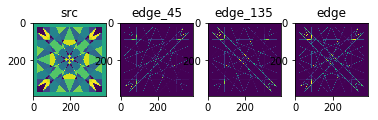

In [26]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread("img3.png",0)
cv2.imshow("src",src)
#卷积，边界扩充为symm，镜像反射
IconR1,IconR2 = roberts(src,'symm')
#45度方向上的边缘强度灰度级显示
IconR1 = np.abs(IconR1)#uint8,取绝度值衡量灰度强度，方案1
edge_45 = IconR1.astype(np.uint8)
cv2.imshow("edge_45",edge_45)
#135度方向上的强度
IconR2 = np.abs(IconR2)
edge_135 = IconR2.astype(np.uint8)
cv2.imshow("edge_135",edge_135)
#方案3，平方后开方
edge = np.sqrt(np.power(IconR1,2.0) + np.power(IconR2,2.0))
edge = np.round(edge) #np.round为小数点四舍五入，默认保留0位
edge[edge>255] = 255
edge = edge.astype(np.uint8)
#显示边缘
cv2.imshow("edge",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ["src","edge_45","edge_135","edge"]
images = [src,edge_45,edge_135,edge]
for i in xrange(4):
    plt.subplot(1,4,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

很明显，Roberts135对45度方向敏感，Roberts45对135度方向敏感，使用开平方法效果最好。